In [1]:
#import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#load dataset
train = pd.read_csv("../input/walmart-recruiting-store-sales-forecasting/train.csv.zip")
test = pd.read_csv("../input/walmart-recruiting-store-sales-forecasting/test.csv.zip")
store = pd.read_csv("../input/walmart-recruiting-store-sales-forecasting/stores.csv")
feature = pd.read_csv("../input/walmart-recruiting-store-sales-forecasting/features.csv.zip")

In [3]:
#find out the shape of dataset
print('train: ', train.shape)
print('feature: ', feature.shape)
print('stores ', store.shape)


train:  (421570, 5)
feature:  (8190, 12)
stores  (45, 3)


In [4]:
#Merge three csv files using inner join.
df = train.merge(feature, on=['Store', 'Date'], how='inner').merge(store, on=['Store'], how='inner')
print(df.shape)
df.head()

(421570, 17)


,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315


In [5]:
#Remove additional IsHoliday column (IsHoliday_y) and rename IsHoliday_x column to IsHoliday.
df = df.drop(['IsHoliday_y'], axis=1)
df = df.rename(columns={'IsHoliday_x':'IsHoliday'})
df.columns


Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'Type', 'Size'],
      dtype='object')

In [6]:
#shape of dataframe created
df.shape

(421570, 16)

In [7]:
#check for null values
df.isnull().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
Type                 0
Size                 0
dtype: int64

In [8]:
#summary of dataframe
df.describe()

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,150681.000000,111248.000000,137091.000000,134967.000000,151432.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123,60.090059,3.361027,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,171.201947,7.960289,136727.915739
std,12.785297,30.492054,22711.183519,18.447931,0.458515,8291.221345,9475.357325,9623.078290,6292.384031,5962.887455,39.159276,1.863296,60980.583328
min,1.000000,1.000000,-4988.940000,-2.060000,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,126.064000,3.879000,34875.000000
25%,11.000000,18.000000,2079.650000,46.680000,2.933000,2240.270000,41.600000,5.080000,504.220000,1878.440000,132.022667,6.891000,93638.000000
50%,22.000000,37.000000,7612.030000,62.090000,3.452000,5347.450000,192.000000,24.600000,1481.310000,3359.450000,182.318780,7.866000,140167.000000
75%,33.000000,74.000000,20205.852500,74.280000,3.738000,9210.900000,1926.940000,103.990000,3595.040000,5563.800000,212.416993,8.572000,202505.000000
max,45.000000,99.000000,693099.360000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,219622.000000


In [9]:
#nformation of dataframe regarding data type and null values 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
 5   Temperature   421570 non-null  float64
 6   Fuel_Price    421570 non-null  float64
 7   MarkDown1     150681 non-null  float64
 8   MarkDown2     111248 non-null  float64
 9   MarkDown3     137091 non-null  float64
 10  MarkDown4     134967 non-null  float64
 11  MarkDown5     151432 non-null  float64
 12  CPI           421570 non-null  float64
 13  Unemployment  421570 non-null  float64
 14  Type          421570 non-null  object 
 15  Size          421570 non-null  int64  
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 51.9+ MB


# Exploratory Data Analysis

Text(0.5, 1.0, '45 stores weekly sales')

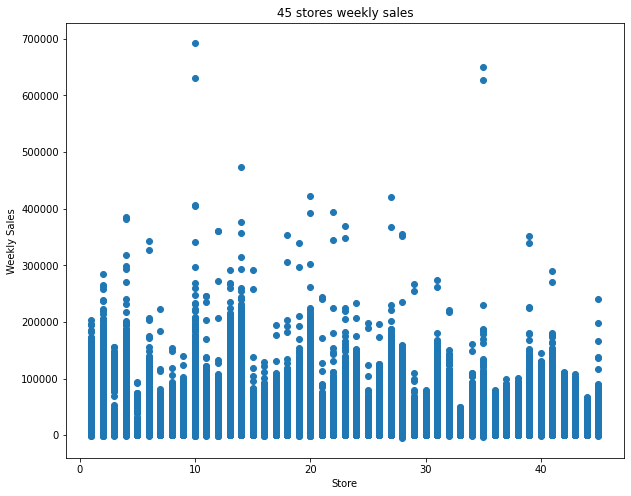

In [10]:
#45 stores weekly sales
fig = plt.figure(figsize =(10, 8))
plt.scatter(df.Store, df.Weekly_Sales)
plt.xlabel('Store')
plt.ylabel('Weekly Sales')
plt.title('45 stores weekly sales')

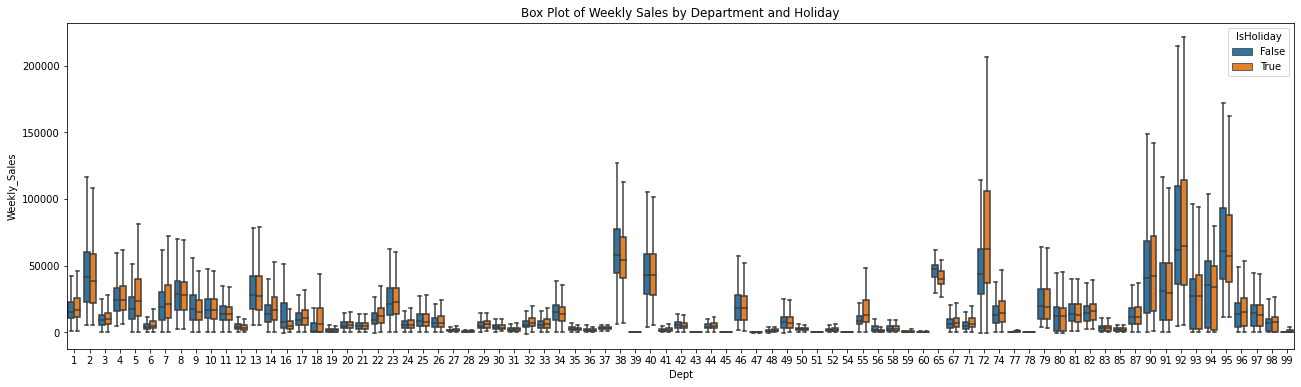

In [11]:
#weekly sales of department and holiday
data= pd.concat([df['Dept'], df['Weekly_Sales'], df['IsHoliday']], axis=1)
plt.figure(figsize=(22,6))
plt.title('Box Plot of Weekly Sales by Department and Holiday')
fig = sns.boxplot(x='Dept', y='Weekly_Sales', data=data, showfliers=False, hue="IsHoliday")

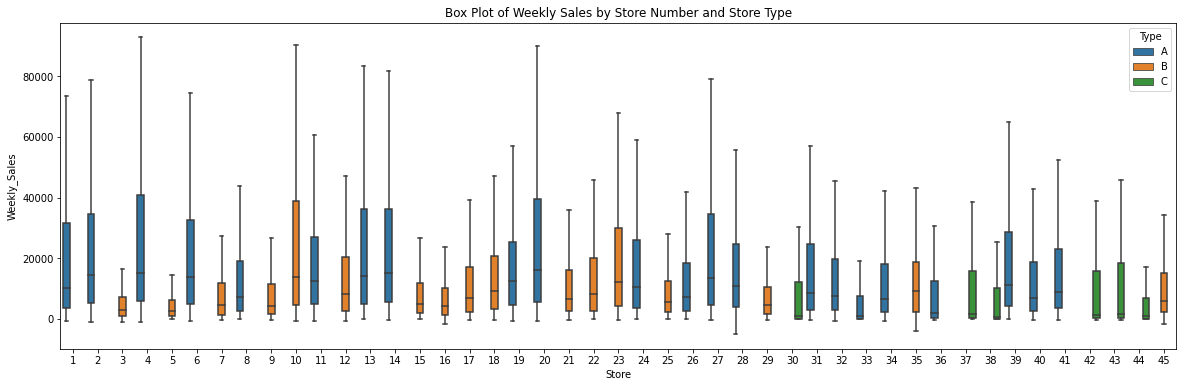

In [12]:
#Plot of Weekly Sales by Store Number and Store Type.
data_8 = pd.concat([df['Store'], df['Weekly_Sales'], df['Type']], axis=1)
plt.figure(figsize=(20,6))
plt.title('Box Plot of Weekly Sales by Store Number and Store Type')
fig = sns.boxplot(x='Store', y='Weekly_Sales', data=data_8, showfliers=False, hue='Type')

Text(0.5, 1.0, 'Weekly sales as per department')

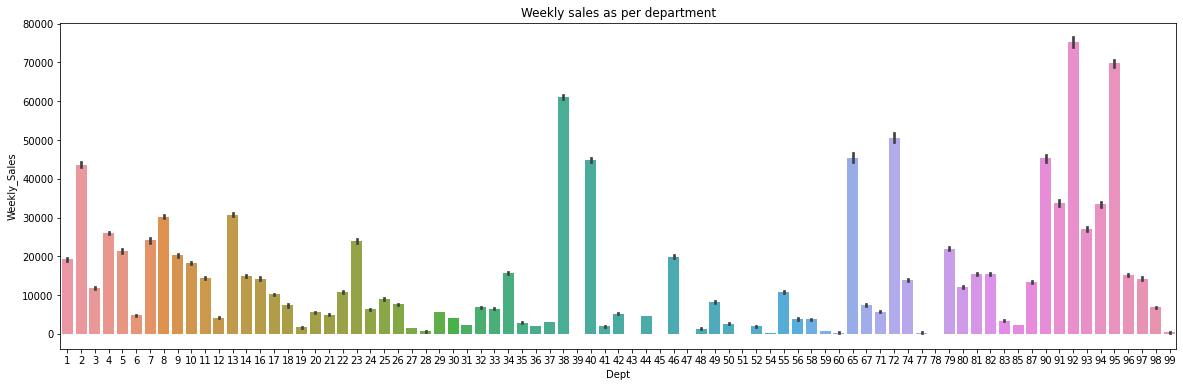

In [13]:
#Saales as per dept
fig = plt.figure(figsize =(20,6))
sns.barplot(x='Dept', y='Weekly_Sales', data=df)
plt.title('Weekly sales as per department')

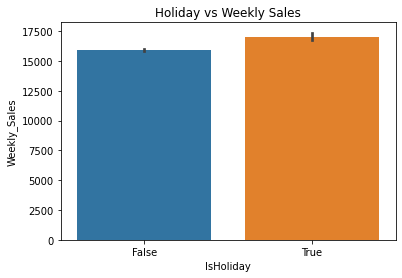

In [14]:
#holiday vs weekly sales
sns.barplot(x='IsHoliday', y='Weekly_Sales', data=df)
plt.title('Holiday vs Weekly Sales')
plt.show()

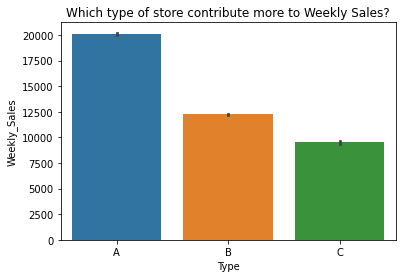

In [15]:
#store type vs weekly sales 
sns.barplot(x='Type', y='Weekly_Sales', data=df)
plt.title('Which type of store contribute more to Weekly Sales?')
plt.show()

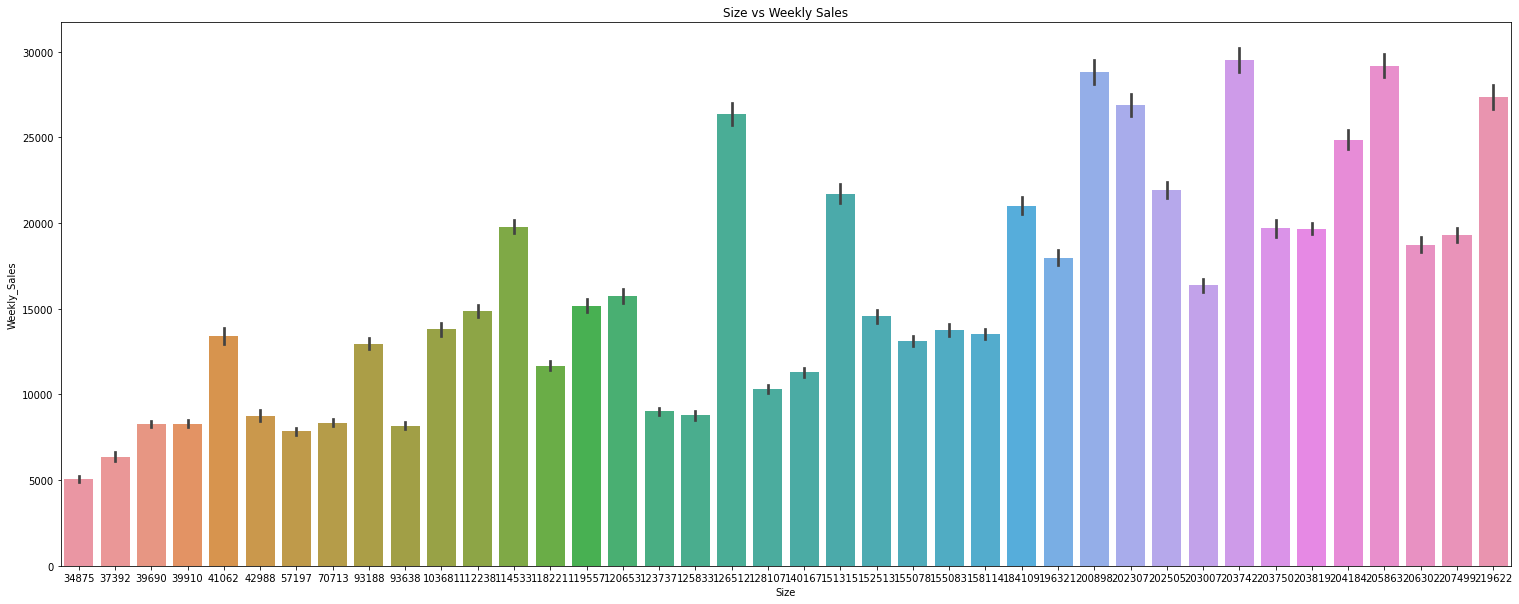

In [16]:
#size vs weekly sales
fig = plt.figure(figsize =(26,10))
sns.barplot(x='Size', y='Weekly_Sales', data=df)
plt.title('Size vs Weekly Sales')
plt.show()

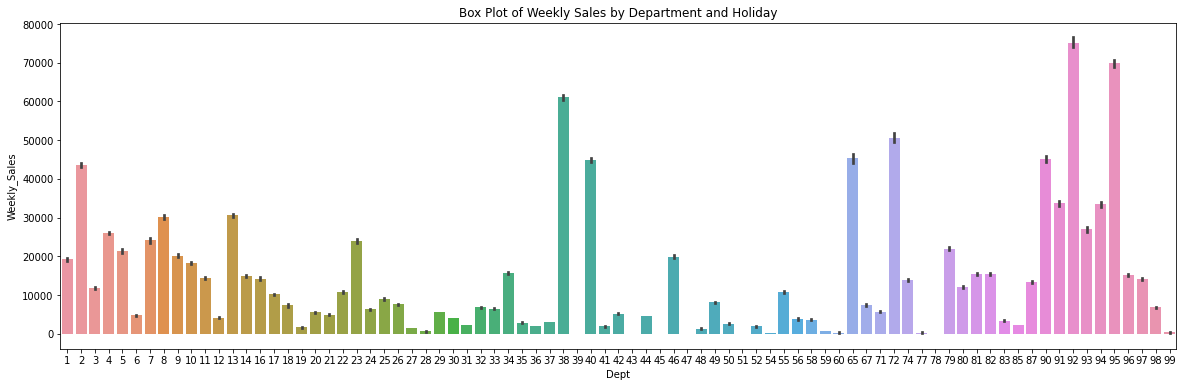

In [17]:
#weekly sales by holiday & dept
data= pd.concat([df['Dept'], df['Weekly_Sales'], df['IsHoliday']], axis=1)
plt.figure(figsize=(20,6))
plt.title('Box Plot of Weekly Sales by Department and Holiday')
fig = sns.barplot(x='Dept', y='Weekly_Sales', data=data)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  """


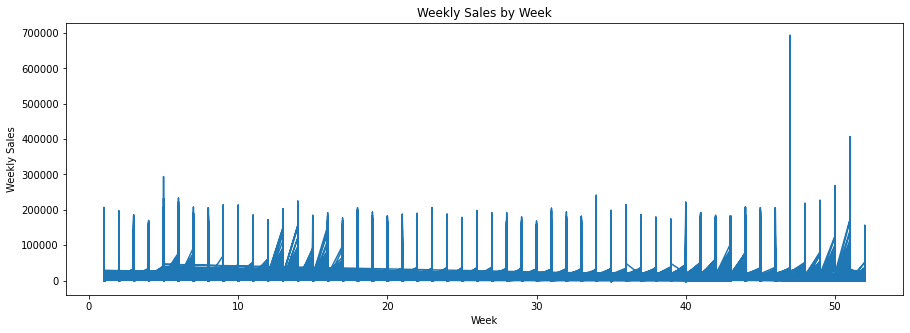

In [18]:
# First we need to get Year, Month and Week columns from Date column.
df.Date = pd.to_datetime(df.Date)
df['Year']  = df.Date.dt.year
df['Month'] = df.Date.dt.month
df['Week']  = df.Date.dt.week

#Plot of Weekly Sales and Week.
plt.figure(figsize=(15,5))
plt.title('Weekly Sales by Week')
plt.xlabel('Week')
plt.ylabel('Weekly Sales')
plt.plot(df.Week,df.Weekly_Sales)
plt.show()

In [19]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Year,Month,Week
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,2010,2,5
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,2010,2,5
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,2010,2,5
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,2010,2,5
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,2010,2,5


# **Data preprocessing**

In [20]:
df.isnull().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
Type                 0
Size                 0
Year                 0
Month                0
Week                 0
dtype: int64

In [21]:
# Remove rows with null values in all columns
df.dropna(axis=0, how="all", inplace=True)
# Remove all rows with null values in all rows
df.dropna(axis=1, how="all", inplace=True)
# Fill missing values with 0
df=df.fillna(0)

In [22]:
#check for null values
df.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
Type            0
Size            0
Year            0
Month           0
Week            0
dtype: int64

In [23]:
# Remove negative values as sales cannot be negative values.
df= df[df['Weekly_Sales'] >= 0]
df.shape

(420285, 19)

<AxesSubplot:>

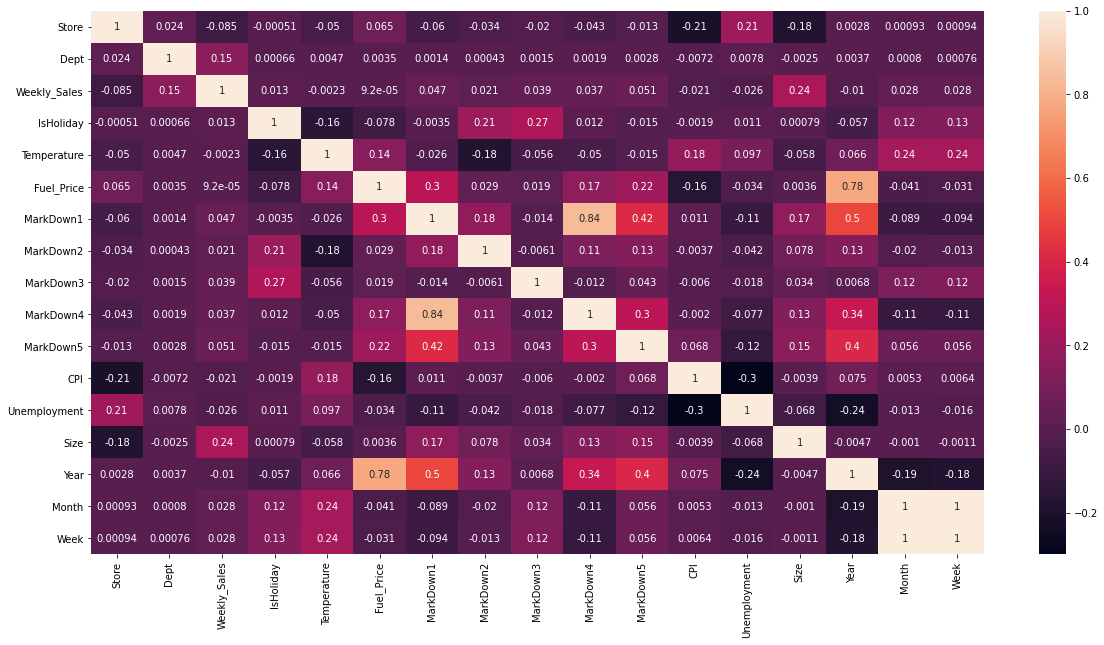

In [24]:
#heatmap to find out correlation b/w attributes
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(),annot=True)

# Time Series Modelling

In [25]:
# It is necessary to have the date columns present in the dataset to be available in the datetime format as in ARIMA model it is required to see the sales values in date-wise fashion.
# Hence converting the string formatted Date into datetime format.
df.Date = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df.Date
df = df.drop('Date', axis=1)
df = df.resample('MS').mean() # Resmapling the time series data with month starting first.

<AxesSubplot:xlabel='Date'>

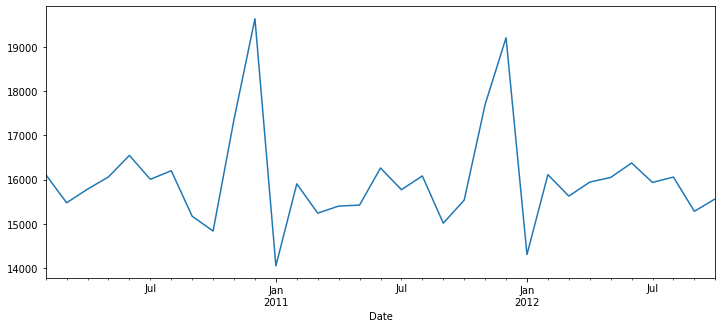

In [26]:
#weekly sales with respect to date as index
df['Weekly_Sales'].plot(figsize=(12,5))

In [44]:
# Train-Test splitting of time series data
train_data = df[:int(0.7*(len(df)))]
test_data = df[int(0.7*(len(df))):]
print('Train data:\n')
print(train_data.tail())
print('='*50,'\n')
print('Test data:\n')
print(test_data.head())
print('Train:', train_data.shape)
print('Test:', test_data.shape)


Train data:

                Store       Dept  Weekly_Sales  IsHoliday  Temperature  \
Date                                                                     
2011-08-01  22.242006  44.356613  16082.682055   0.000000    79.810086   
2011-09-01  22.207410  44.091774  15013.965477   0.200612    72.491448   
2011-10-01  22.147677  44.216090  15536.033513   0.000000    60.285056   
2011-11-01  22.164828  44.374295  17700.949518   0.254022    49.549289   
2011-12-01  22.178926  44.644548  19211.934999   0.199066    40.162278   

            Fuel_Price    MarkDown1    MarkDown2     MarkDown3    MarkDown4  \
Date                                                                          
2011-08-01    3.699652     0.000000     0.000000      0.000000     0.000000   
2011-09-01    3.648625     0.000000     0.000000      0.000000     0.000000   
2011-10-01    3.524900     0.000000     0.000000      0.000000     0.000000   
2011-11-01    3.484023  4568.775420  2619.660126  14553.279071  1099.8290

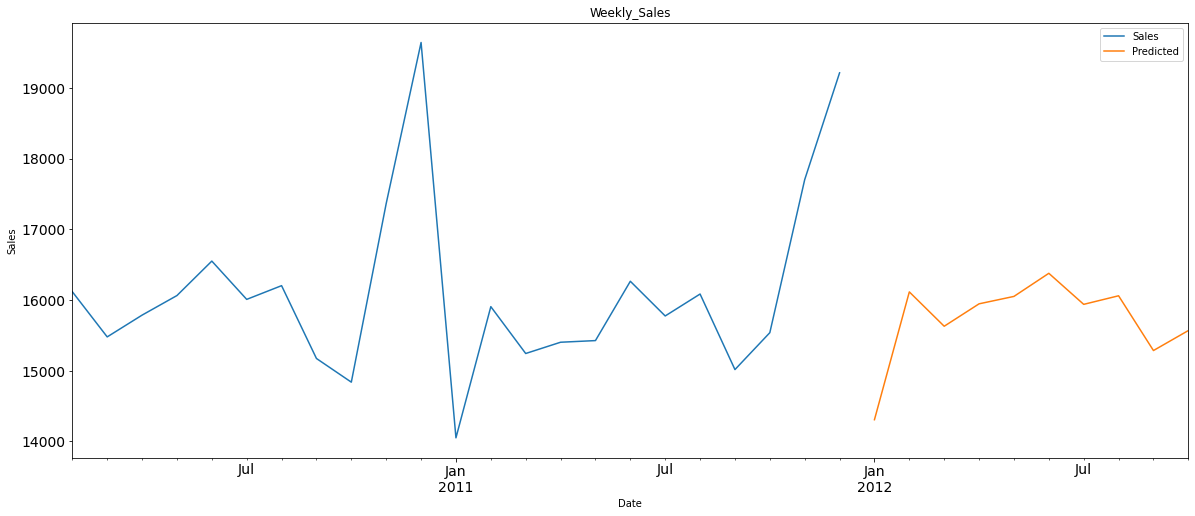

In [45]:
# ARIMA takes univariate data.
train_data = train_data['Weekly_Sales']
test_data = test_data['Weekly_Sales']
# Plot of Weekly_Sales with respect to years in train and test.
train_data.plot(figsize=(20,8), title= 'Weekly_Sales', fontsize=14,label='Sales')
test_data.plot(figsize=(20,8), title= 'Weekly_Sales', fontsize=14, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()


<Figure size 1440x432 with 0 Axes>

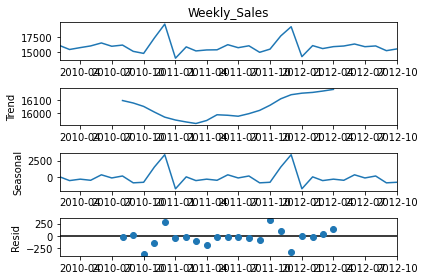

In [46]:
# Decomposition of time series data. It is necessary to see whether the trend, seasonality and residual are present in data or not.
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df['Weekly_Sales'], model='additive')
plt.figure(figsize=(20,6))
result.plot()
plt.show()

In [47]:
# A check of sationarity of data using Dicky-Fuller test.
from statsmodels.tsa.stattools import adfuller
result = adfuller(df['Weekly_Sales'])
print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

ADF Statistic: -4.173916935101529
p-value: 0.0007291844915316654
Critical Values:
	1%: -3.769732625845229
	5%: -3.005425537190083
	10%: -2.6425009917355373


In [ ]:
# install pmdarima library to build auto-arima model.
!pip install pmdarima

In [49]:
# auto_arima model on train data.
from pmdarima.arima import auto_arima
model_auto_arima = auto_arima(train_data, trace=True,start_p=0, start_q=0, start_P=0, start_Q=0,
                  max_p=10, max_q=10, max_P=10, max_Q=10, seasonal=True,
                  stepwise=False, suppress_warnings=True, D=1, max_D=10,
                  error_action='ignore',approximation = False)
model_auto_arima.fit(train_data)


ModuleNotFoundError: No module named 'pmdarima'

In [48]:
# Predictthe test values
forecast = model_auto_arima.predict(n_periods=len(test_data))
forecast = pd.DataFrame(forecast,index = test_data.index,columns=['Prediction'])
plt.figure(figsize=(20,6))
#plt.title('Prediction of Weekly Sales using Auto ARIMA model', fontsize=20)
#plt.plot(train_data, label='Train')
#plt.plot(test_data, label='Test')
#plt.plot(forecast, label='Prediction using ARIMA Model')
#plt.legend(loc='best')
#plt.xlabel('Date', fontsize=14)
#plt.ylabel('Weekly Sales', fontsize=14)
#plt.show()
print(forecast.head())
print(test_data.head())


NameError: name 'model_auto_arima' is not defined

In [50]:
# Performance metric for ARIMA model -MSE/RMSE
import math
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print('Mean Squared Error (MSE) of ARIMA: ', mean_squared_error(test_data, forecast))
print('Root Mean Squared Error (RMSE) of ARIMA: ', math.sqrt(mean_squared_error(test_data, forecast)))
print('Mean Absolute Deviation (MAD) of ARIMA: ', mean_absolute_error(test_data, forecast))


NameError: name 'forecast' is not defined

# Machine Learning Models

In [51]:
#merge the 3 csv files to make a test dataset
test_stores = pd.merge(test,store)
test = pd.merge(test_stores,feature)
test.head()

,Store,Dept,Date,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573
1,1,2,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573
2,1,3,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573
3,1,4,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573
4,1,5,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573


In [52]:
#Numeric Encoding
# Converting Categorical Variable 'Type' & 'IsHoliday' into Numerical Variables.
code_numeric = {"A": 1,"B": 2,"C": 3,False: 0,True: 1}
df = df.applymap(lambda s: code_numeric.get(s) if s in code_numeric else s)
test = test.applymap(lambda s: code_numeric.get(s) if s in code_numeric else s)

In [56]:
#Train-test split data
from sklearn.model_selection import train_test_split
y = df['Weekly_Sales']
X = df.drop(['Weekly_Sales'], axis=1) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # Train:Test = 70:30 splitting.
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.3) #Train:CV = 70:30 splitting.

In [57]:
#Random Forest Regressor model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from xgboost import XGBRegressor

rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [58]:
#Evaluation parameters of Random Forest Regressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print("Random Forest Regressor")
print("MAE:",mean_absolute_error(y_test,y_pred))
print("MSE:",mean_squared_error(y_test,y_pred))
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred)))
print("r2_Score:",r2_score(y_test,y_pred))

Random Forest Regressor
MAE: 369.5159114971195
MSE: 241372.97861826723
RMSE: 491.2972405970414
r2_Score: 0.6853362657326431


In [60]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score, max_error, mean_absolute_percentage_error, mean_squared_log_error

print("Random Forest Regressor")
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))
print("Mean Absolute Percentage Error (MAPE):", mean_absolute_percentage_error(y_test, y_pred))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_test, y_pred)))
print("Akaike information criterion (AIC):", len(y_test)*np.log(mean_squared_error(y_test, y_pred))+2*(len(y_test)-1))
print("R-Squared (R2) Score:", r2_score(y_test, y_pred))
print("Normalized Root Mean Squared Error (NRMSE):", np.sqrt(mean_squared_error(y_test, y_pred))/np.std(y_test))
print("Weighted Absolute Percentage Error (WAPE):", np.sum(np.abs(y_test-y_pred))/np.sum(np.abs(y_test)))
print("Weighted Mean Absolute Percentage Error (WMAPE):", np.sum(np.abs(y_test-y_pred))/np.sum(np.abs(y_test))*100)


Random Forest Regressor
Mean Absolute Error (MAE): 369.5159114971195
Mean Absolute Percentage Error (MAPE): 0.02424726104436319
Mean Squared Error (MSE): 241372.97861826723
Root Mean Squared Error (RMSE): 491.2972405970414
Akaike information criterion (AIC): 141.94098645250455
R-Squared (R2) Score: 0.6853362657326431
Normalized Root Mean Squared Error (NRMSE): 0.560948958700662
Weighted Absolute Percentage Error (WAPE): 0.02335527636379578
Weighted Mean Absolute Percentage Error (WMAPE): 2.335527636379578


In [61]:
#Decision Tree Regressor model
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print("Decision Tree Regressor")
print("MAE:",mean_absolute_error(y_test,y_pred_dt))
print("MSE:",mean_squared_error(y_test,y_pred_dt))
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred_dt)))
print("r2_Score:",r2_score(y_test,y_pred_dt))

Decision Tree Regressor
MAE: 870.3971318548353
MSE: 1079177.5585212668
RMSE: 1038.8347118388308
r2_Score: -0.4068602146177911


In [62]:
print("Decision Tree Regressor")
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred_dt))
print("Mean Absolute Percentage Error (MAPE):", mean_absolute_percentage_error(y_test, y_pred_dt))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred_dt))
print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_test, y_pred_dt)))
print("Akaike information criterion (AIC):", len(y_test)*np.log(mean_squared_error(y_test, y_pred_dt))+2*(len(y_test)-1))
print("R-Squared (R2) Score:", r2_score(y_test, y_pred_dt))
print("Normalized Root Mean Squared Error (NRMSE):", np.sqrt(mean_squared_error(y_test, y_pred_dt))/np.std(y_test))
print("Weighted Absolute Percentage Error (WAPE):", np.sum(np.abs(y_test-y_pred_dt))/np.sum(np.abs(y_test)))
print("Weighted Mean Absolute Percentage Error (WMAPE):", np.sum(np.abs(y_test-y_pred_dt))/np.sum(np.abs(y_test))*100)

Decision Tree Regressor
Mean Absolute Error (MAE): 870.3971318548353
Mean Absolute Percentage Error (MAPE): 0.055299069207507656
Mean Squared Error (MSE): 1079177.5585212668
Root Mean Squared Error (RMSE): 1038.8347118388308
Akaike information criterion (AIC): 156.91709789109126
R-Squared (R2) Score: -0.4068602146177911
Normalized Root Mean Squared Error (NRMSE): 1.1861113837316422
Weighted Absolute Percentage Error (WAPE): 0.05501350531392026
Weighted Mean Absolute Percentage Error (WMAPE): 5.501350531392026


In [63]:
#knn Regressor model
knn = KNeighborsRegressor(n_neighbors=11)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print("KNN Regressor")
print("MAE:",mean_absolute_error(y_test,y_pred_knn))
print("MSE:",mean_squared_error(y_test,y_pred_knn))
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred_knn)))
print("r2_Score:",r2_score(y_test,y_pred_knn))

KNN Regressor
MAE: 553.3538501434581
MSE: 668393.6470278606
RMSE: 817.5534520921923
r2_Score: 0.12865457377072265


In [64]:
# Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred_knn)
print("Mean Absolute Error:", mae)

# Mean Absolute Percentage Error
mape = np.mean(np.abs((y_test - y_pred_knn) / y_test)) * 100
print("Mean Absolute Percentage Error:", mape)

# Mean Squared Error
mse = mean_squared_error(y_test, y_pred_knn)
print("Mean Squared Error:", mse)

# Root Mean Squared Error
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

# Akaike information criterion
aic = len(y_test) * np.log(mse) + 2 * (len(X_test.columns) + 1)
print("Akaike information criterion:", aic)

# R-Squared
r2 = r2_score(y_test, y_pred_knn)
print("R-Squared:", r2)

# Normalized Root Mean Squared Error
nrmse = rmse / (y_test.max() - y_test.min())
print("Normalized Root Mean Squared Error:", nrmse)

# Weighted Absolute Percentage Error
y_range = y_test.max() - y_test.min()
wape = np.sum(np.abs(y_test - y_pred_knn)) / np.sum(np.abs(y_test)) * 100
print("Weighted Absolute Percentage Error:", wape)

# Weighted Mean Absolute Percentage Error
wmape = np.sum(np.abs(y_test - y_pred_knn)) / np.sum(y_test) * 100
print("Weighted Mean Absolute Percentage Error:", wmape)

Mean Absolute Error: 553.3538501434581
Mean Absolute Percentage Error: 3.5800775309612627
Mean Squared Error: 668393.6470278606
Root Mean Squared Error: 817.5534520921923
Akaike information criterion: 168.12632570912336
R-Squared: 0.12865457377072265
Normalized Root Mean Squared Error: 0.22382774670941782
Weighted Absolute Percentage Error: 3.4974764807040373
Weighted Mean Absolute Percentage Error: 3.4974764807040373


In [65]:
#Linear Regression model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("Linear Regression")
print("MAE:",mean_absolute_error(y_test,y_pred_lr))
print("MSE:",mean_squared_error(y_test,y_pred_lr))
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred_lr)))
print("r2_Score:",r2_score(y_test,y_pred_lr))

Linear Regression
MAE: 7132.511801263872
MSE: 93476390.72410831
RMSE: 9668.318919238665
r2_Score: -120.85966440593282


In [71]:
n = len(y_test)
# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred_lr)

# Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y_test - y_pred_lr) / y_test)) * 100

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred_lr)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Akaike information criterion (AIC)
aic = n * np.log(mse) + 2 * (X_test.shape[1] + 1)

# R-Squared
r2 = r2_score(y_test, y_pred_lr)

# Normalized Root Mean Squared Error (NRMSE)
nrmse = rmse / (y_test.max() - y_test.min())

# Weighted Absolute Percentage Error (WAPE)
wape = np.sum(np.abs(y_test - y_pred_lr)) / np.sum(np.abs(y_test))

# Weighted Mean Absolute Percentage Error (WMAPE)
wmape = np.sum(np.abs(y_test - y_pred_lr) / np.sum(np.abs(y_test))) * 100

print("Linear Regression")
print("Mean Absolute Error (MAE):", mae)
print("Mean Absolute Percentage Error (MAPE):", mape)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Akaike information criterion (AIC):", aic)
print("R-Squared:", r2)
print("Normalized Root Mean Squared Error (NRMSE):", nrmse)
print("Weighted Absolute Percentage Error (WAPE):", wape)
print("Weighted Mean Absolute Percentage Error (WMAPE):", wmape)

Linear Regression
Mean Absolute Error (MAE): 7132.511801263872
Mean Absolute Percentage Error (MAPE): 44.67893694231105
Mean Squared Error (MSE): 93476390.72410831
Root Mean Squared Error (RMSE): 9668.318919238665
Akaike information criterion (AIC): 217.5321945674949
R-Squared: -120.85966440593282
Normalized Root Mean Squared Error (NRMSE): 2.6469682595349058
Weighted Absolute Percentage Error (WAPE): 0.4508108557805666
Weighted Mean Absolute Percentage Error (WMAPE): 45.08108557805666


In [66]:
#check for the null values in test data
test.isnull().sum()

Store               0
Dept                0
Date                0
IsHoliday           0
Type                0
Size                0
Temperature         0
Fuel_Price          0
MarkDown1         149
MarkDown2       28627
MarkDown3        9829
MarkDown4       12888
MarkDown5           0
CPI             38162
Unemployment    38162
dtype: int64

In [67]:
#fill the null values with mean value
CPI_mean = test['CPI'].mean()
Unemp_mean = test['Unemployment'].mean()
test['CPI'] = test['CPI'].fillna(CPI_mean)
test['Unemployment'] = test['Unemployment'].fillna(Unemp_mean)
test = test.fillna(0)
# Converting Date to datetime
test['Date'] = pd.to_datetime(test['Date'])
# Extract date features
test['Date_dayofweek'] = test['Date'].dt.dayofweek
test['Date_month'] = test['Date'].dt.month 
test['Date_year'] = test['Date'].dt.year
test.head()

,Store,Dept,Date,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Date_dayofweek,Date_month,Date_year
0,1,1,2012-11-02,0,1,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,4,11,2012
1,1,2,2012-11-02,0,1,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,4,11,2012
2,1,3,2012-11-02,0,1,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,4,11,2012
3,1,4,2012-11-02,0,1,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,4,11,2012
4,1,5,2012-11-02,0,1,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,4,11,2012


In [68]:
#Exclude Date as it throws error while making prediction.
test_kaggle = test.loc[:, test.columns != 'Date']
model_rf = RandomForestRegressor(n_estimators=80).fit(X_train,y_train) # Fit the model with original train data.
y_pred = model_rf.predict(test_kaggle) # Predict the final test data that Kaggle has provided.

ValueError: X has 17 features, but DecisionTreeRegressor is expecting 16 features as input.

In [69]:
# Weekly Sales Prediction is the final file to be submitted in Kaggle.
submission = pd.DataFrame({
        "Id": test.Store.astype(str)+'_'+test.Dept.astype(str)+'_'+test.Date.astype(str), # Preparing in the format provided in samplesubmission.csv.
        "Weekly_Sales": y_pred # This is predicetd Weekly Sales on final test data using Random Forest regression.
    })
submission.to_csv('Weekly Sales Prediction.csv', index=False) # Final submission.

ValueError: array length 10 does not match index length 115064